<sup>This notebook is originally from https://github.com/lizanafj/UHI_mapping and licensed for reuse under [GPL-3.0 license].</sup>

# Data Analytics - Hourly Diagnosis 
---

This notebook has different data analysis techniques for the diagnosis of the urban heat island in cities

In [1]:
import os
import requests
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt #biblioteca de generación de gráficos
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import datetime
from datetime import datetime

# get folder location of script
cwd = os.getcwd()

## Define name of city project to work
---

Define the name of the **`city`** (projectname) to upload/save all data during the workflow

In [2]:
#City project: 
city= "London"

## Import input data of the project - config.py 
---

In [3]:
os.chdir(cwd)

In [4]:
cwd_main = cwd[:-10]
cwd_project = cwd_main + f"\projectname\{city}"
print(cwd_main)
print(cwd_project)

C:\Users\engs2371\Dropbox\4. OXFORD\2_CWS\00_CODIGO\CWS_TOOL_v3
C:\Users\engs2371\Dropbox\4. OXFORD\2_CWS\00_CODIGO\CWS_TOOL_v3\projectname\London


In [5]:
#import config.py file

# go to current location of script
os.chdir(cwd_project)
import config as cf

In [7]:
#check input variables
print("city: ",cf.city)
print("first date: ",cf.first_date)
print("last date: ",cf.last_date)
print("lat,long: ",cf.lat,cf.long)
print("plot: ",cf.plot)
print("extent:",cf.extent)

city:  London
first date:  01-01-2021 00:00
last date:  31-12-2021 23:00
lat,long:  51.515313777970874 -0.1297586219709724
plot:  70
extent: [-0.6339481488657184, 0.3744309049237735, 51.20073848986681, 51.82988906607494]


## Data analytics - Hourly Diagnosis of UHI intensity
---

Read final files after pre-processing and preliminary analytical steps

In [8]:
#Read data from OWS
os.chdir(cf.cwd_data_filt)
os.listdir()

['Coordinates_London_2021_CWS_all_QC_G8.csv',
 'Coordinates_London_2021_OWS_QC_I5.csv',
 'Temperature_London_2021_CWS_all_QC_G8.csv',
 'Temperature_London_2021_OWS_QC_I5.csv']

In [9]:
temp_OWS = pd.read_csv("Temperature_London_2021_OWS_QC_I5.csv", index_col='date',parse_dates=True)

In [10]:
#Read data from CWS
os.chdir(cf.cwd_data_proc)
os.listdir()

['Coordinates_London_2021_CWS_all_QC_G8_proc.csv',
 'Coordinates_London_2021_CWS_all_QC_G8_proc_CDH.csv',
 'Temperature_London_2021_CWS_all_QC_G8_proc.csv',
 'temporal_List_rural_stations.csv',
 'xTemperature_London_2021_CWS_rural_stations.csv']

In [11]:
temp_CWS = pd.read_csv("Temperature_London_2021_CWS_all_QC_G8_proc.csv", index_col='date',parse_dates=True)
temp_rural = pd.read_csv("xTemperature_London_2021_CWS_rural_stations.csv", index_col='date',parse_dates=True)
coord_CWS = pd.read_csv("Coordinates_London_2021_CWS_all_QC_G8_proc_CDH.csv")

Calculation of temperature difference between urban and rural (UHI intensity = temp_CWS - temp_rural)

In [12]:
#UHI intensity
uhi_intensity = temp_CWS.copy()

for i in range(0,len(uhi_intensity)):   
    uhi_intensity.iloc[i] = temp_CWS.iloc[i] - temp_rural.iloc[i].values

Calculation of percentales of UHI intensity

In [13]:
uhi_intensity_perc = uhi_intensity.copy()

In [14]:
uhi_intensity_perc["90th Percentile"] = np.nan
uhi_intensity_perc["75th Percentile"] = np.nan
uhi_intensity_perc["25th Percentile"] = np.nan
uhi_intensity_perc = uhi_intensity_perc[["90th Percentile","75th Percentile","25th Percentile"]]

In [15]:
for i in range(0,len(uhi_intensity)):   
    uhi_intensity_perc["90th Percentile"].iloc[i] = uhi_intensity.iloc[i].quantile(0.9)
    uhi_intensity_perc["75th Percentile"].iloc[i] = uhi_intensity.iloc[i].quantile(0.75)
    uhi_intensity_perc["25th Percentile"].iloc[i] = uhi_intensity.iloc[i].quantile(0.25)

Comparison of Temperature profiles with UHI intensity percentiles

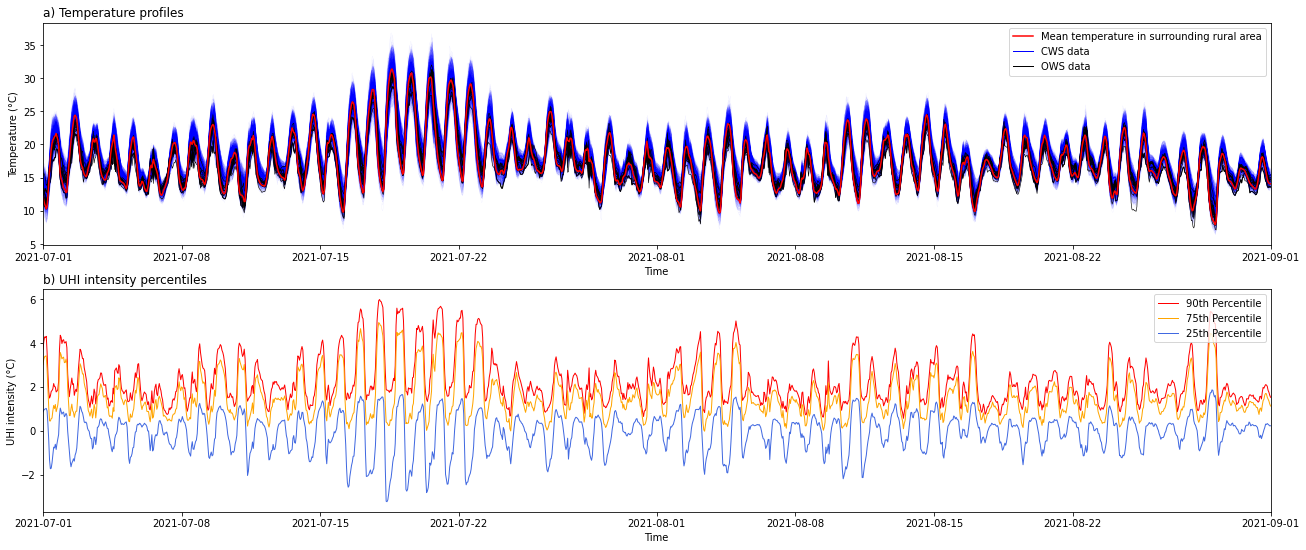

In [16]:
#Figure to check day
day1="2021-07-01"
day2="2021-09-01"

#global figure
fig, axes = plt.subplots(2, 1, sharex=False)
fig.set_size_inches(22,9)

#Fig. 1_temperature 
axes[0].set_title('a) Temperature profiles',loc="left",fontsize=12)

axes[0].plot(temp_rural.truncate(before=day1, after=day2).iloc[:,0],color='red',alpha=1,label="Mean temperature in surrounding rural area",linewidth=1.5)
axes[0].plot(temp_CWS.truncate(before=day1, after=day2).iloc[:,0],color='blue',alpha=1,label="CWS data",linewidth=1)
axes[0].plot(temp_OWS.truncate(before=day1, after=day2).iloc[:,0],color='k',alpha=1,label="OWS data",linewidth=1)

axes[0].plot(temp_CWS.truncate(before=day1, after=day2),color='blue',alpha=0.1,label='_Hidden',linewidth=0.2)
axes[0].plot(temp_OWS.truncate(before=day1, after=day2),color='k',alpha=1,label='_Hidden',linewidth=0.6)
axes[0].plot(temp_rural.truncate(before=day1, after=day2),color='red',alpha=1,label='_Hidden',linewidth=1.5)

axes[0].set(xlabel='Time', ylabel='Temperature (°C)')     
axes[0].legend(loc='upper right')
axes[0].margins(x=0)

#2
axes[1].set_title('b) UHI intensity percentiles',loc="left",fontsize=12)

axes[1].plot(uhi_intensity_perc[["90th Percentile"]].truncate(before=day1, after=day2).iloc[:,0],color='red',alpha=1,label="90th Percentile",linewidth=1)
axes[1].plot(uhi_intensity_perc[["75th Percentile"]].truncate(before=day1, after=day2).iloc[:,0],color='orange',alpha=1,label="75th Percentile",linewidth=1)
axes[1].plot(uhi_intensity_perc[["25th Percentile"]].truncate(before=day1, after=day2).iloc[:,0],color='royalblue',alpha=1,label="25th Percentile",linewidth=1)

axes[1].set(xlabel='Time', ylabel='UHI intensity (°C)')
axes[1].legend(loc='upper right')
axes[1].margins(x=0)

os.chdir(cf.cwd_figures)
plt.savefig(f"04_Analytics_{city}_figure1.jpg", format='jpg')
plt.show()


Annual UHI intensity mapping by kriging interpolation over streetmap

In [25]:
extent = cf.extent

In [26]:
#Cartopy
import cartopy 
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

#kriging
import pykrige #biblioteca de geoestadística - https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/
import pykrige.kriging_tools as kt #herramientas para exportar e importar archivos .asc con biblioteca PyKrige
from pykrige.ok import OrdinaryKriging #Kriging Ordinario con PyKrige

from matplotlib.cm import ScalarMappable

#upload functions
os.chdir(cf.cwd_scripts_visual)
from functions.streetmap import image_spoof #street map API

In [27]:
def data_extraction(time,CWS_temperature,CWS_coordinates,rural_temp): 
    
    map_time = time   #'2021-08-29 08:00:00'
    
    #Extraction of data for that day
    UHIday = CWS_temperature.loc[map_time]
    UHIday = UHIday.to_frame()
    UHIday = UHIday.reset_index()
    UHIday["temp"] = UHIday.iloc[:,[1]]
    UHIday = UHIday.drop(UHIday.columns[[1]], axis=1)
    UHIday = UHIday.rename(columns={"index":"module_final"})
    
    UHIday2 = pd.merge(UHIday,CWS_coordinates[['module_final','lat','long']], on="module_final")
    UHIday3 = UHIday2.dropna()
    
    
    #Delta temperature with regards to baseline (mean surrounding rural areas) 
    rural_temp = temp_rural.loc[map_time].values[0]
    
    UHIday4 = UHIday3.copy()
    UHIday4["DeltaT"] = UHIday4["temp"] - rural_temp
    #UHIday4["DeltaT"] = UHIday4["Dif"].mask((UHIday4["Dif"]<0),0)

    return UHIday4, rural_temp, map_time

In [28]:
time_extraction = '2021-07-20 22:00:00'
time_temp, rural_temp , map_time = data_extraction(time_extraction,temp_CWS,coord_CWS,temp_rural)

In [29]:
x = np.array(time_temp['long'])
y = np.array(time_temp['lat'])
temp=np.array(time_temp['temp'])

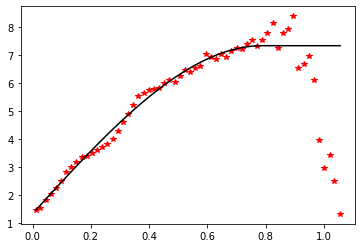

KeyboardInterrupt: 

In [30]:
###############################################################################
# Create the ordinary kriging object. 
OK = OrdinaryKriging(x,y,temp, variogram_model="spherical", nlags=60,weight= True,  
                      enable_plotting=True, 
                    coordinates_type='geographic',enable_statistics=True)

grid_x = np.arange(extent[0],extent[1],0.005) #size of pixel ########## IMPORTANT 0.005 defaout
grid_y = np.arange(extent[2],extent[3],0.005)

###############################################################################
# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
z, ss = OK.execute('grid', grid_x, grid_y)

#save results of kriging
# Writes the kriged grid to an ASCII grid file and plot it.
os.chdir(cf.cwd_figures)
kt.write_asc_grid(grid_x, grid_y, z, filename="kriging_ordinario.asc") #Kriging Ordinario en forma de matriz
kt.write_asc_grid(grid_x, grid_y, ss, filename="kriging_ordinario_var.asc") #Varianza de estimación en forma de matriz

#-------------------------------------------------------------------------------------------

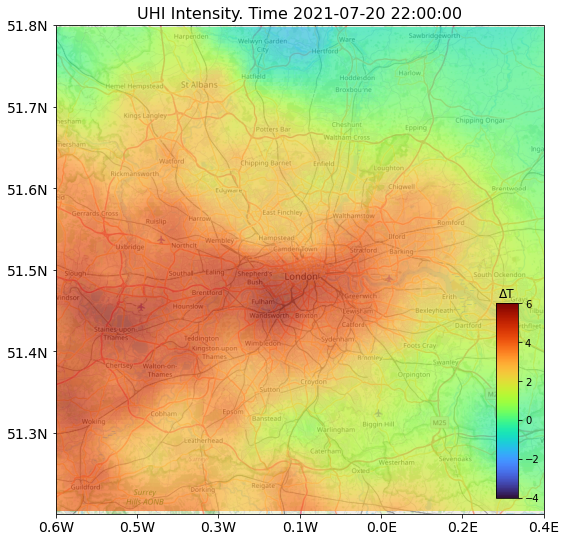

In [32]:
#upload results of kriging
os.chdir(cf.cwd_figures)
asc = pd.read_csv("./kriging_ordinario.asc", header=None, skiprows=7, sep="\s+") 

#calculate deltaT
asc = asc - rural_temp

temp2=np.array(asc)

##############################################################################
#PLOT kriging over map using CARTOPY - street map API
#-------------------------------------------------------------------------------------------

cimgt.Stamen.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.OSM() # spoofed, downloaded street map  'terrain-background', 'terrain'  'toner'

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
ax1.set_title('UHI Intensity. Time '+str(map_time),fontsize=16)

ax1.set_extent(extent) # set extents
ax1.set_xticks(np.linspace(extent[0],extent[1],7),crs=ccrs.PlateCarree()) # set longitude indicators
ax1.set_yticks(np.linspace(extent[2],extent[3],7)[1:],crs=ccrs.PlateCarree()) # set latitude indicators
lon_formatter = LongitudeFormatter(number_format='0.1f',degree_symbol='',dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.1f',degree_symbol='') # format lats
ax1.xaxis.set_major_formatter(lon_formatter) # set lons
ax1.yaxis.set_major_formatter(lat_formatter) # set lats
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

scale = np.ceil(-np.sqrt(2)*np.log(np.divide((extent[1]-extent[0])/2.0,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification

cmap = plt.get_cmap("turbo") #Color alternatives: "turbo" "Reds" "hot_r" "jet"   -   "OrRd" "gist_heat_r" "afmhot_r" "RdBu_r"
ax1=plt.imshow(temp2, transform=ccrs.PlateCarree(),cmap=cmap,extent=[extent[0],extent[1],extent[2],extent[3]],alpha=0.65,zorder=1,vmin=-4, vmax=6) #min and max similar to bar

#temperature bar
norm = plt.Normalize(-4,6) #max and min   -  temp2.min(),temp2.max()
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbaxes = fig.add_axes([0.74, 0.15, 0.025, 0.3])
cbar = fig.colorbar(sm, cax=cbaxes, orientation='vertical',shrink=0.3,aspect=10)
cbar.ax.set_title("ΔT")

#plt.text(-5,4, "Time: "+str(map_time.hour)+":00", fontsize=20, color='k')
os.chdir(cf.cwd_figures)
plt.savefig(f"04_Analytics_{city}_figure2.jpg", format='jpg')
plt.show()